# Les télephones portables en Ukraine

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("phones_data.csv")

In [3]:
df.shape

(1224, 13)

In [4]:
df.head(6)

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
1,1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
2,2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020
5,5,Honor,10 6/64GB Black,Android,71,10865.0,10631.0,11099.0,2,5.80,64.0,3400.0,6-2018


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1224 non-null   int64  
 1   brand_name      1224 non-null   object 
 2   model_name      1224 non-null   object 
 3   os              1027 non-null   object 
 4   popularity      1224 non-null   int64  
 5   best_price      1224 non-null   float64
 6   lowest_price    964 non-null    float64
 7   highest_price   964 non-null    float64
 8   sellers_amount  1224 non-null   int64  
 9   screen_size     1222 non-null   float64
 10  memory_size     1112 non-null   float64
 11  battery_size    1214 non-null   float64
 12  release_date    1224 non-null   object 
dtypes: float64(6), int64(3), object(4)
memory usage: 124.4+ KB


In [6]:
df.isnull().sum()

Unnamed: 0          0
brand_name          0
model_name          0
os                197
popularity          0
best_price          0
lowest_price      260
highest_price     260
sellers_amount      0
screen_size         2
memory_size       112
battery_size       10
release_date        0
dtype: int64

In [7]:
plt.rcParams["figure.figsize"]=(8,5)

Text(0.5, 1.0, 'Matrice de corrélation entre les différentes caractéristiques\n')

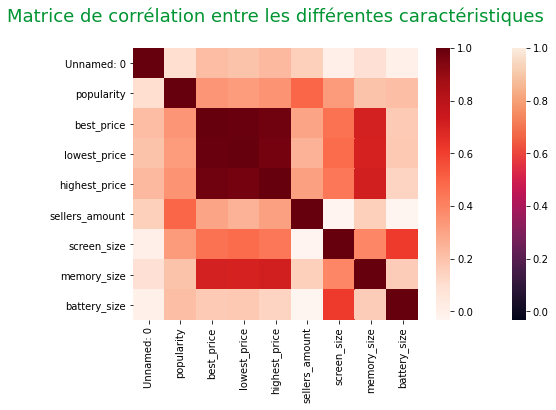

In [8]:
sns.heatmap(df.corr())
sns.heatmap(df.corr(), cmap='Reds')
plt.title("Matrice de corrélation entre les différentes caractéristiques\n", fontsize=18, color='#009432')

# 

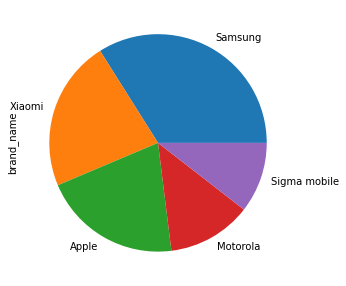

In [9]:
marque=df["brand_name"].value_counts(dropna=True).head()

marque.plot(kind='pie')

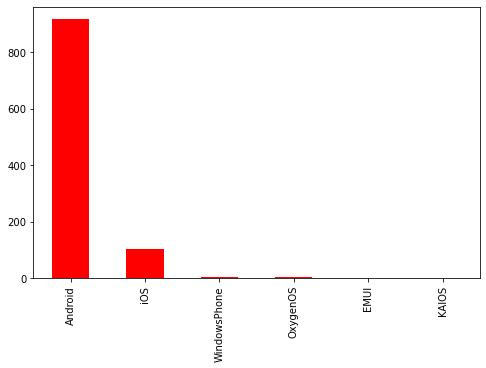

In [10]:
systeme=df["os"].value_counts(dropna=True)

systeme.plot(kind='bar', color='red')

## Comparaison général

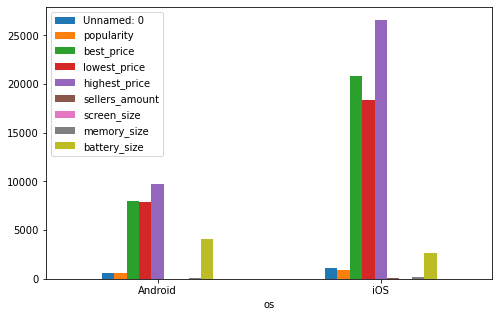

In [11]:
df.groupby('os').mean().loc[['Android','iOS']].plot.bar(rot=0)

## Comparaison des prix


In [12]:
android=df[df['os']=='Android']
apple=df[df['os']=='iOS']

In [13]:
# Etude du prix
df[['highest_price','best_price','lowest_price']].agg(['max','min','mean'])

,highest_price,best_price,lowest_price
max,69999.000000,56082.000000,49999.000000
min,229.000000,214.000000,198.000000
mean,9883.410788,7941.206699,7716.018672


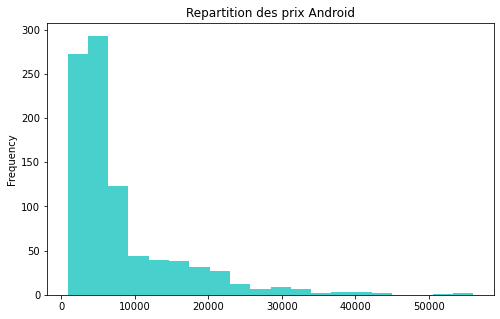

In [14]:
android['best_price'].plot(kind='hist', title='Repartition des prix Android', color='mediumturquoise', bins=20)

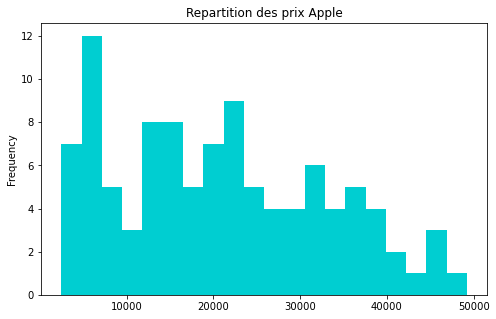

In [15]:
apple['best_price'].plot(kind='hist', title='Repartition des prix Apple', color='darkturquoise', bins=20)

## Comparaison des autres critéres 

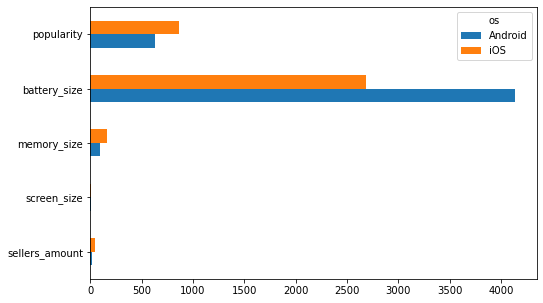

In [16]:
df.groupby('os').mean().loc[['Android','iOS'],['sellers_amount','screen_size','memory_size','battery_size','popularity']].T.plot(kind='barh')

## Petites analyses en plus

In [17]:
# le systeme d'exploitation le plus populaire : iOS
df.groupby(['os']).mean().sort_values(by='popularity', ascending=False)

,Unnamed: 0,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
os,,,,,,,,,
iOS,1158.757282,868.281553,20869.611650,18357.489796,26588.091837,42.300971,5.534951,160.427184,2683.556701
KAIOS,977.000000,832.000000,1036.000000,899.000000,1059.000000,42.000000,2.400000,4.000000,2000.000000
Android,559.557377,628.603279,8009.955191,7914.871907,9718.104803,13.010929,6.042166,96.629508,4138.092206
OxygenOS,70.000000,448.000000,6612.666667,6006.666667,8365.666667,9.333333,5.500000,106.666667,3400.000000
EMUI,708.500000,412.000000,31656.000000,30981.000000,33089.000000,10.000000,6.580000,512.000000,4200.000000
WindowsPhone,567.000000,197.000000,2600.000000,NaN,NaN,1.000000,4.500000,16.000000,2000.000000


In [18]:
# Le modèle le plus populaire 

famous=df['popularity'].max()
df[df['popularity']==famous]

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
1147,1147,Apple,iPhone 12 Pro 128GB Pacific Blue (MGMN3/MGLR3),iOS,1224,33992.0,31849.0,42999.0,101,6.1,128.0,2815.0,10-2020


## Comparaison entre Apple et Android

In [19]:
android.describe()

,Unnamed: 0,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
count,915.000000,915.000000,915.000000,687.000000,687.000000,915.000000,914.000000,915.000000,911.000000
mean,559.557377,628.603279,8009.955191,7914.871907,9718.104803,13.010929,6.042166,96.629508,4138.092206
std,303.984621,355.657866,7614.651802,7352.922383,9700.999339,16.503560,0.559190,106.046135,1301.245464
min,0.000000,2.000000,840.000000,1215.000000,1338.000000,1.000000,2.800000,4.000000,1300.000000
25%,293.500000,313.000000,3442.000000,3327.500000,3811.500000,2.000000,5.662500,32.000000,3300.000000
50%,556.000000,646.000000,5199.000000,4999.000000,5759.000000,6.000000,6.200000,64.000000,4000.000000
75%,808.500000,944.500000,8999.000000,9249.500000,11563.500000,18.000000,6.500000,128.000000,4710.000000
max,1222.000000,1223.000000,56082.000000,49999.000000,69999.000000,102.000000,8.100000,1000.000000,13000.000000


In [20]:
apple.describe()

,Unnamed: 0,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
count,103.000000,103.000000,103.000000,98.000000,98.000000,103.000000,103.000000,103.000000,97.000000
mean,1158.757282,868.281553,20869.611650,18357.489796,26588.091837,42.300971,5.534951,160.427184,2683.556701
std,112.932434,279.443579,12123.081177,11427.287869,14550.522592,35.532320,0.839434,142.186746,720.911575
min,63.000000,8.000000,2445.000000,2395.000000,2689.000000,1.000000,2.800000,4.000000,1500.000000
25%,1143.500000,701.500000,11002.500000,8000.000000,17112.500000,11.500000,4.700000,64.000000,1828.000000
50%,1169.000000,873.000000,19810.000000,16454.000000,24927.000000,33.000000,5.800000,128.000000,2815.000000
75%,1194.500000,1111.000000,30491.500000,27635.000000,35717.000000,67.500000,6.100000,256.000000,3110.000000
max,1220.000000,1224.000000,49242.000000,45120.000000,64999.000000,125.000000,6.700000,512.000000,3969.000000


## Visualisation dans le temps

In [21]:
df['date']=pd.to_datetime(df["release_date"])

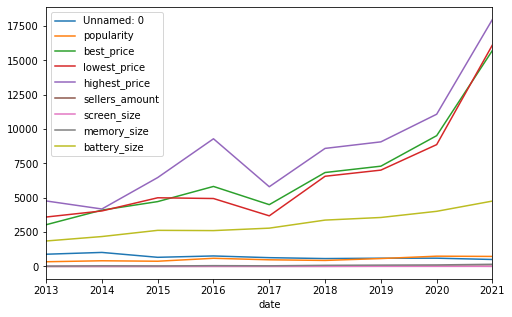

In [22]:
df.set_index('date').resample('Y').mean().plot()


# Modéle de prédiction 

In [ ]:
# Modèle pour l'appretissage de la régression (non pertinent car les données ne sont corrélées )

In [23]:
y=df['popularity']

In [24]:
x=df['best_price']
x= np.array(x).reshape((-1, 1))

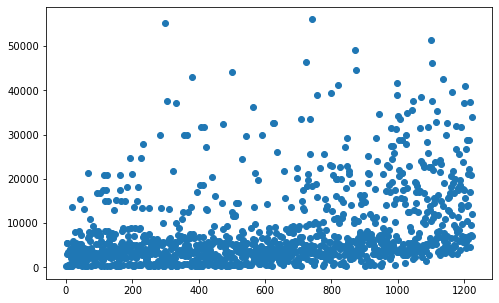

In [25]:
plt.scatter(y,x)
plt.show()

In [26]:
model_linReg = LinearRegression()
model_linReg.fit(x, y)

LinearRegression()

In [27]:
precision = model_linReg.score(x, y)
print(precision)

0.1187397350259406


In [28]:
prediction = model_linReg.predict(x)
print(prediction)

[526.86751039 528.41544694 528.41544694 ... 624.31902022 760.63332642
 516.14154297]


In [29]:
prediction = model_linReg.intercept_ + model_linReg.coef_*[7000,8000,90000,89876]
print(prediction)

[ 599.60682964  613.30538318 1736.58677284 1734.88815221]
